Housing Prices Regression
Dataset : https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df['ocean_proximity'].describe()

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])
df['ocean_proximity']

,ocean_proximity
0,3
1,3
2,3
3,3
4,3
...,...
20635,1
20636,1
20637,1
20638,1


In [ ]:
x = df.drop(['median_house_value'], axis=1)
sc = MinMaxScaler()
y = sc.fit_transform(df['median_house_value'].values.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 42, test_size = 0.2)

print(x)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean

In [ ]:
print(y)

[[0.90226638]
 [0.70824656]
 [0.69505074]
 ...
 [0.15938285]
 [0.14371281]
 [0.15340349]]


In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(10, input_dim = x_train.shape[1], activation = 'relu'))
model.add(tf.keras.layers.Dense(6, activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173 (692.00 B)

 Trainable params: 173 (692.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = tf.keras.losses.mae, optimizer = 'adam', metrics = ['mse'])

history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 100, batch_size = 16)

model.evaluate(x_test, y_test)

y_pred = model.predict(x_test)

mae = tf.keras.losses.MeanAbsoluteError()
loss = mae(y_test, y_pred)
loss = loss.numpy()
print(loss)

Epoch 1/100
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.7725 - mse: 7768.9106 - val_loss: 3.2676 - val_mse: 53.5365
Epoch 2/100
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.1080 - mse: 49.8380 - val_loss: 1.7674 - val_mse: 21.1662
Epoch 3/100
818/818 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6450 - mse: 15.7419 - val_loss: 0.9683 - val_mse: 13.3199
Epoch 4/100
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0076 - mse: 12.2336 - val_loss: 0.5356 - val_mse: 9.6728
Epoch 5/100
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8568 - mse: 12.7354 - val_loss: 0.8502 - val_mse: 8.6897
Epoch 6/100
818/818 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7315 - mse: 3.0484 - val_loss: 0.6639 - val_mse: 7.0061
Epoch 7/100
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6757 - mse: 10.2814 - val_loss: 1.0247 - val_mse: 7.2942
Epoch 8/100
818/818 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7008 - mse: 13.6186 - val_loss: 0.2867 - val_mse: 5.1326
Epoch 9/100
818/818 ━━━━━━━━━━━━━━━

Text(0, 0.5, 'Loss')

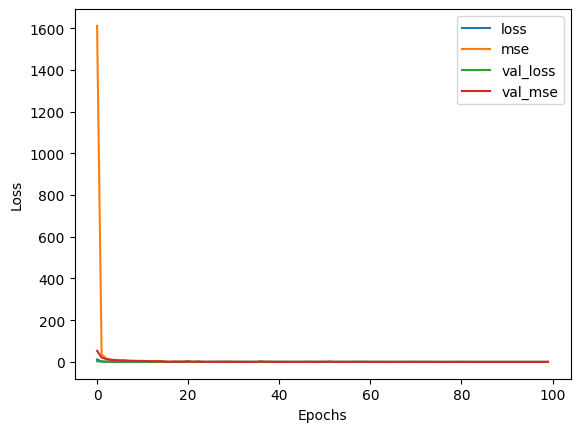

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')